In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from pywaffle import Waffle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



In [8]:
df = pd.read_csv(r'C:\Users\jeetr\jupyter\Iris.csv')
print(df.head)

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

Dropping the Id column as we don't need it.

In [9]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Checking for null values.

In [13]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Analysing the dataset: EDA

In [22]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(df, values=df['Species'].value_counts(), names=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
fig.update_traces(pull=[0.1, 0.1, 0.0], hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

 We see that we have an equal distribution of the target variable: Species. So, there is no need of upsampling or downsampling. We are good to go!

Text(0.5, 1.0, 'Sepal Width vs Sepal Length')

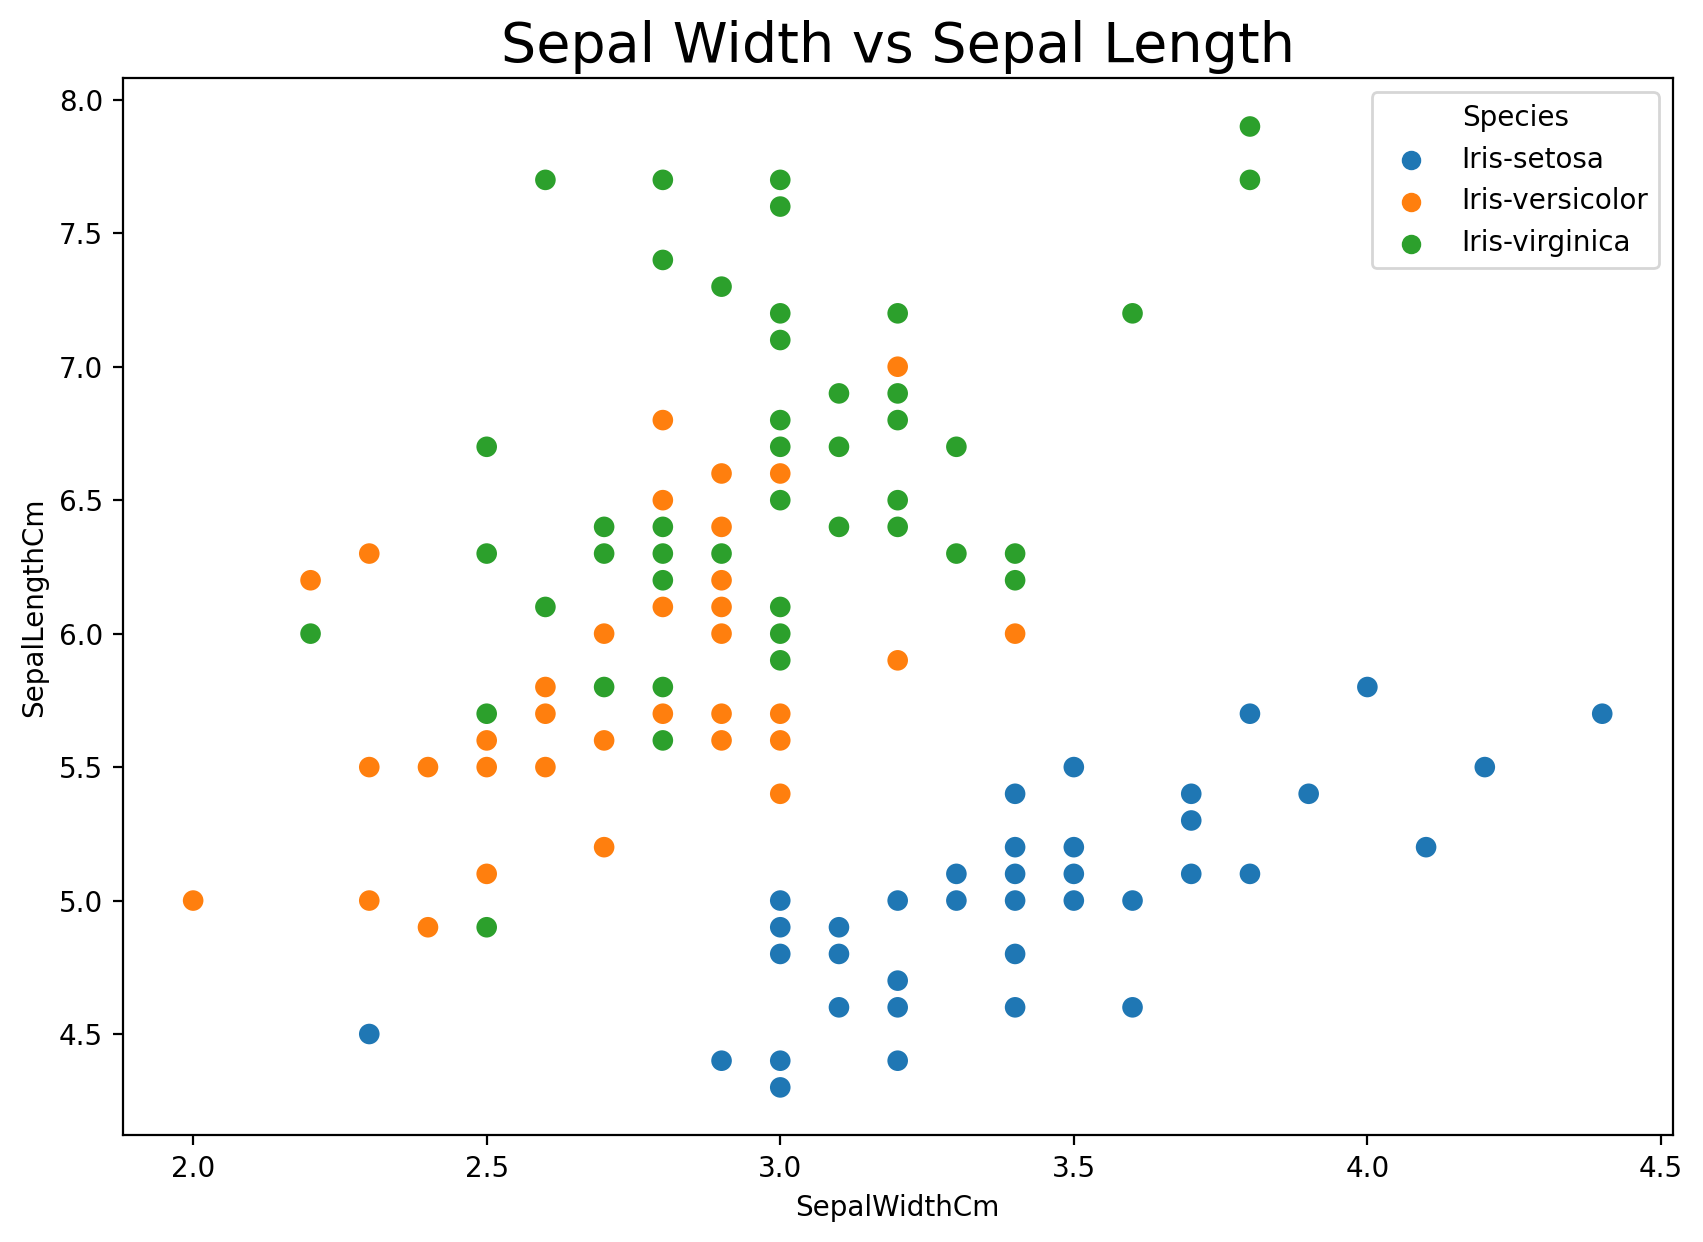

In [23]:
plt.figure(figsize=[10, 7], dpi=200)
sns.scatterplot(data=df, x='SepalWidthCm', y='SepalLengthCm', hue='Species', s=65)
plt.title('Sepal Width vs Sepal Length', fontsize=20)

Text(0.5, 1.0, 'Petal Width vs Petal Length')

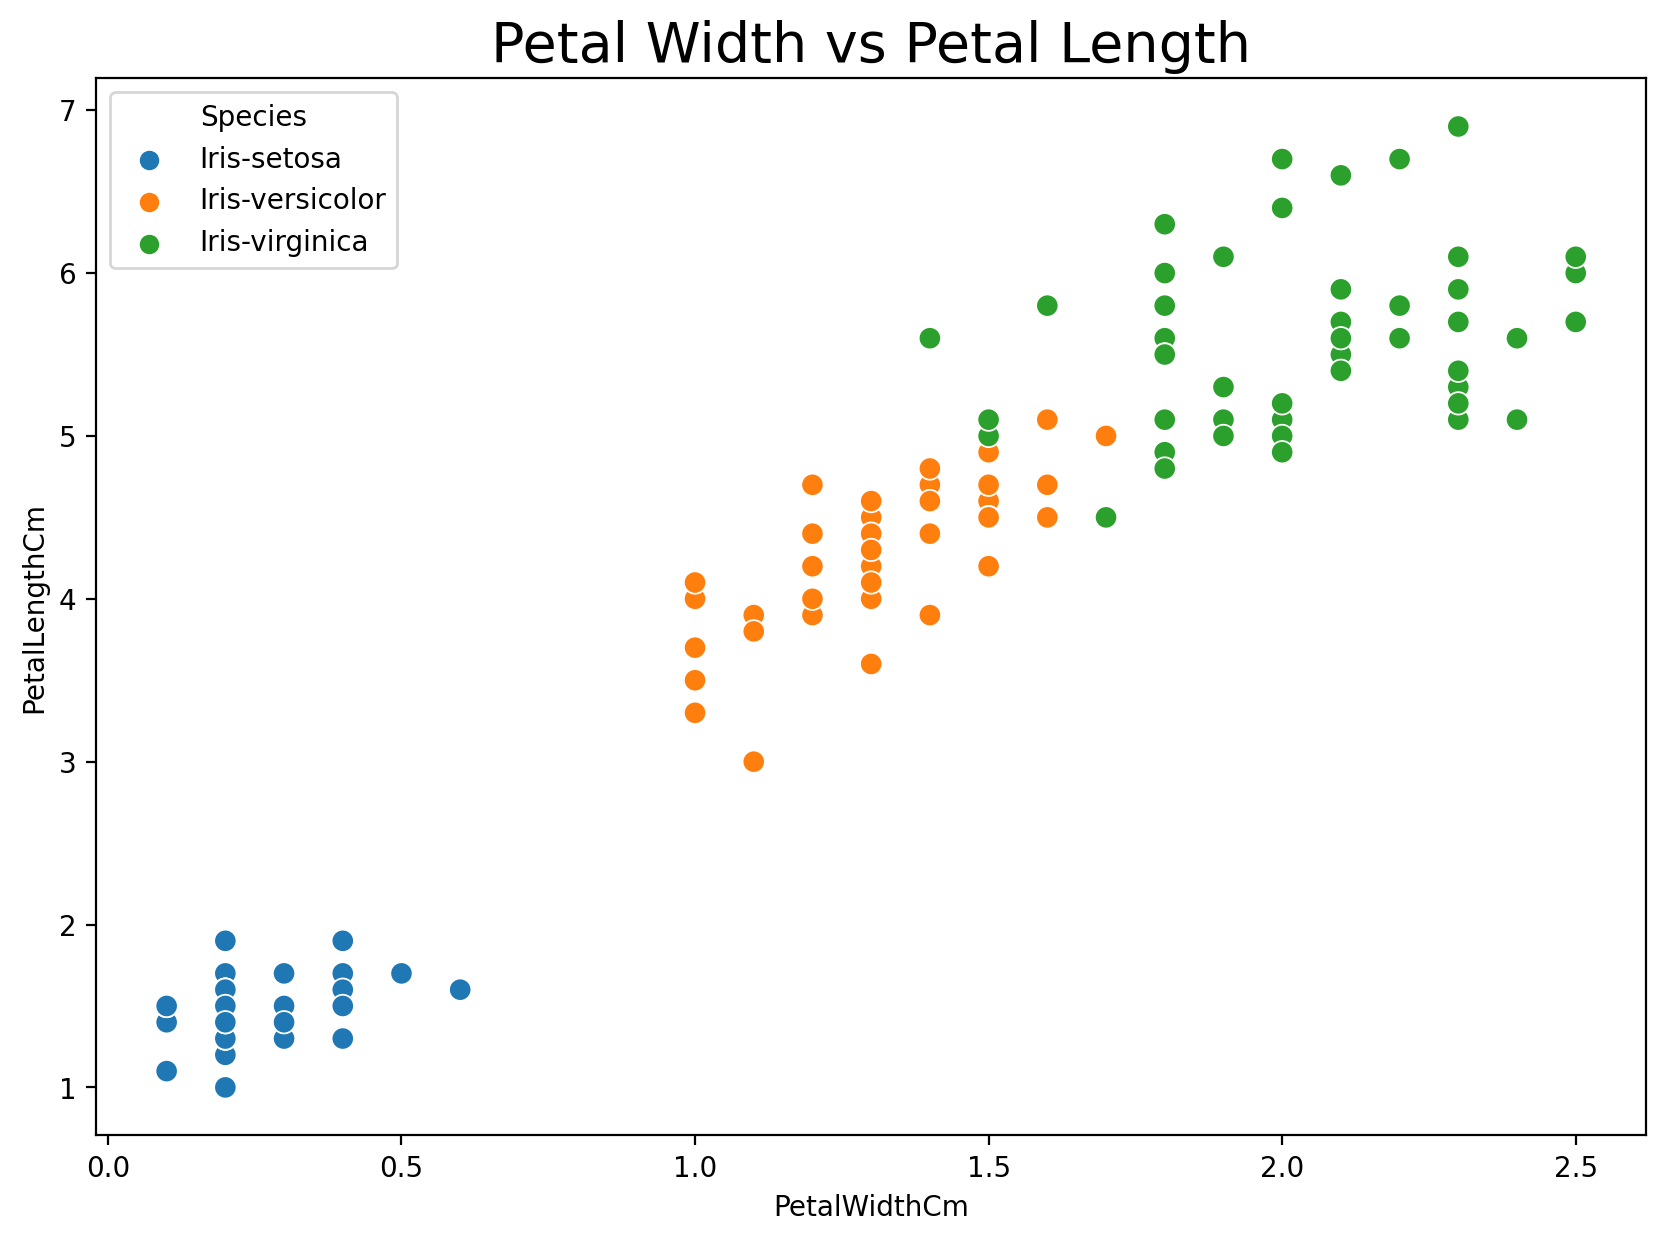

In [24]:
plt.figure(figsize=[10, 7], dpi=200)
sns.scatterplot(data=df, x='PetalWidthCm', y='PetalLengthCm', hue='Species', s=65)
plt.title('Petal Width vs Petal Length', fontsize=20)

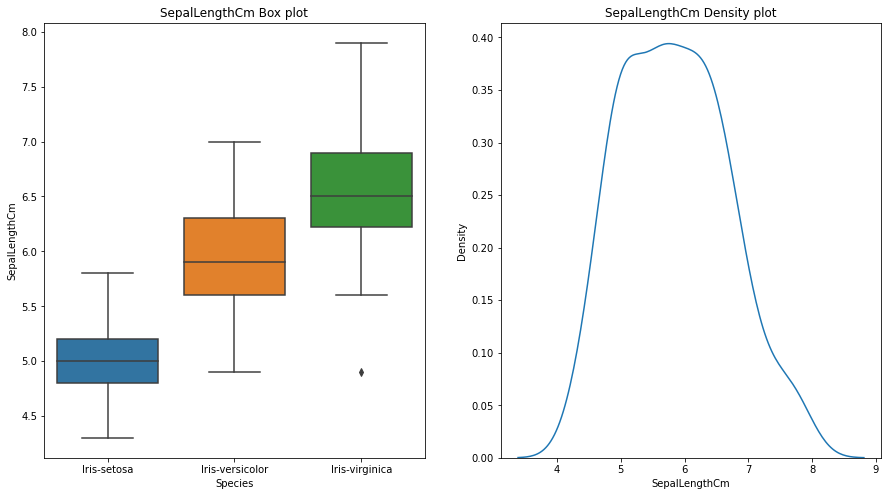

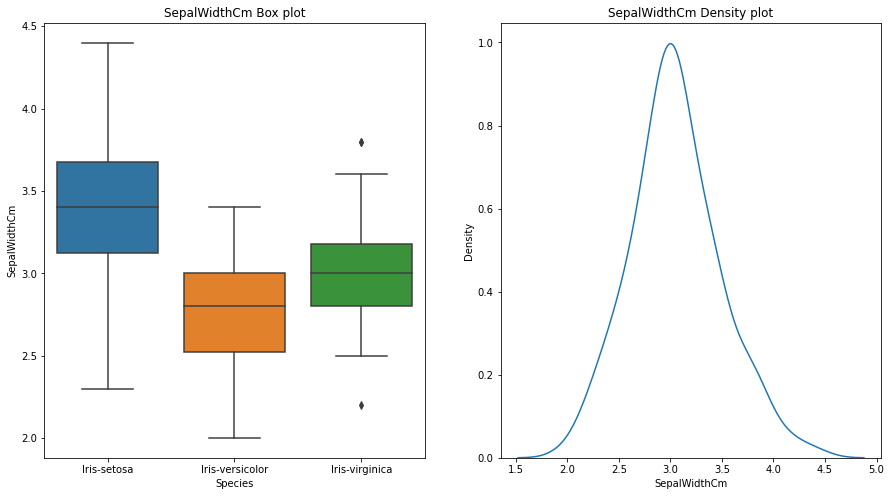

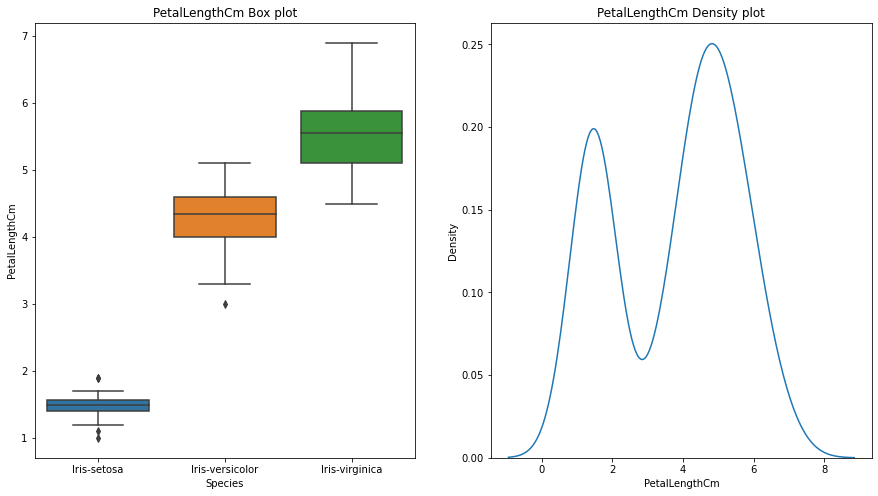

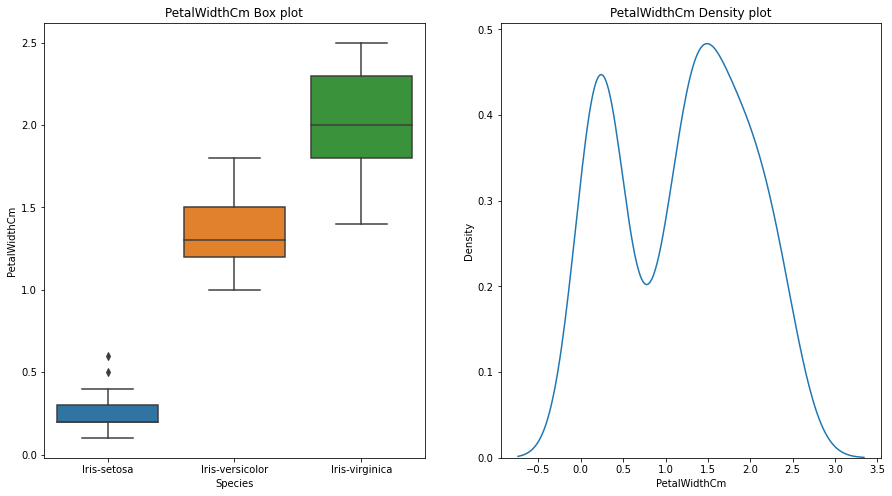

In [26]:
def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Species', y=feature)
    plt.title(f'{feature} Box plot')
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature])
    plt.title(f'{feature} Density plot')

for i in df.drop(['Species'], axis=1):
    feature_viz(feature=i)

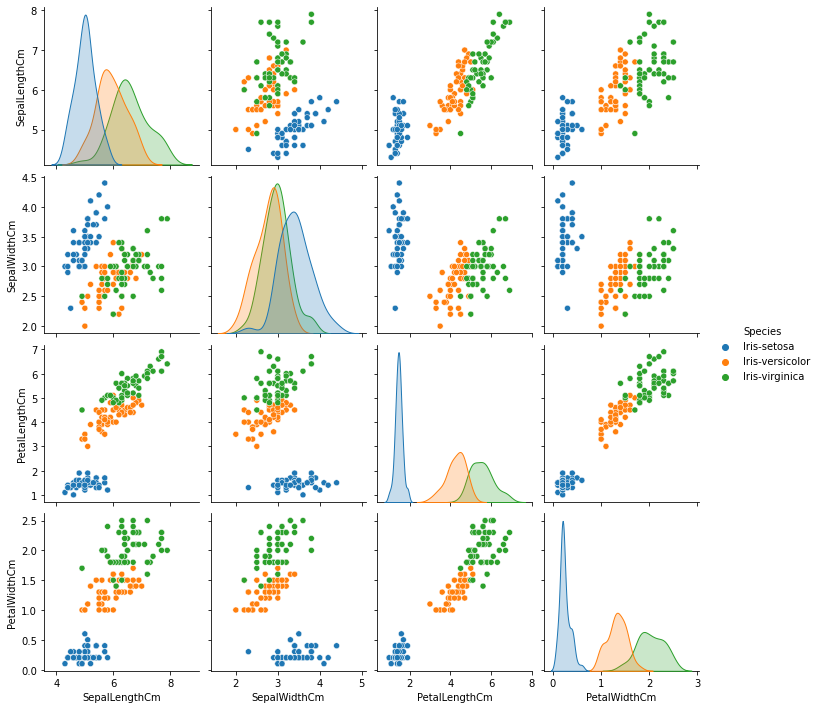

In [27]:
sns.pairplot(df, hue='Species')

# Model Building

Now, we will build classification models for the Iris dataset. I'll first show the Supervised Models and then one Unsupervised Model called KNN Clustering.

Supervised Models

📌 Logistic Regression: Regression for Classification

📌 K-Nearest Neighbors: Uses the concept of nearest neighbors

📌 Random Forest Classifier: Gets a cumulative vote of a number of decision trees

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x = df.drop('Species', axis=1)
print(x)
y = df['Species']
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [35]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
13             4.3           3.0            1.1           0.1
102            7.1           3.0            5.9           2.1
67             5.8           2.7            4.1           1.0
34             4.9           3.1            1.5           0.1
98             5.1           2.5            3.0           1.1
..             ...           ...            ...           ...
63             6.1           2.9            4.7           1.4
70             5.9           3.2            4.8           1.8
81             5.5           2.4            3.7           1.0
11             4.8           3.4            1.6           0.2
95             5.7           3.0            4.2           1.2

[105 rows x 4 columns]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
33             5.5           4.2            1.4           0.2
16             5.4           3.9            1.3           0.4
43             5.0           3.5            1.

# Logistic Regression

In [36]:
lr = LogisticRegression(max_iter=1000)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(lr, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.04


# Accuracy (Logistic Regression): 94%

# KNN

In [37]:
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(knn, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.05


# Accuracy (KNN): 96%

# Random Forest Classifier

In [38]:
rfc = RandomForestClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(rfc, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.93 accuracy with a standard deviation of 0.03


# Accuracy (Random Forest): 94%

# Unsupervised Model

# KNN Clustering

In [39]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [40]:
val = df.iloc[:, [0, 1, 2, 3]].values

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(val)
    inertia.append(kmeans.inertia_)

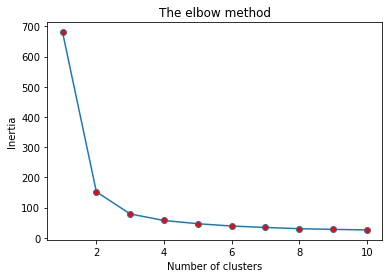

In [41]:
plt.plot(range(1, 11), inertia, marker='o', mfc='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

📌 Well the best is 3. We also need only 3 clusters as we have 3 types of target variables.

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(val)
labels = y_kmeans.predict(val)

In [43]:
def display_cluster(X,km,num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plt.figure(figsize=[10, 8])
    for i in range(num_clusters):
        plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=150, label=labels[i])
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = 'black', marker = 'o', s = 200)
    plt.legend()

Plotting Clusters

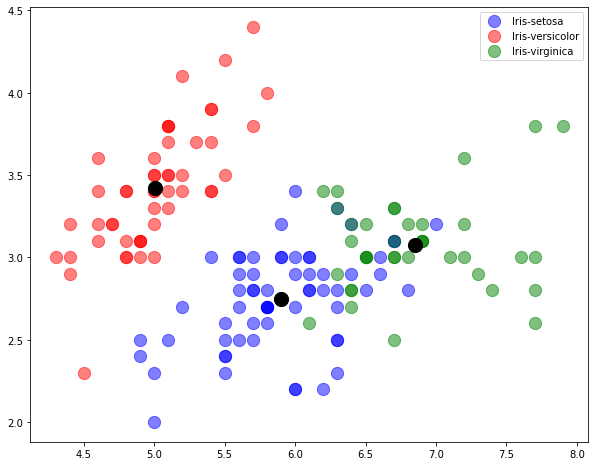

In [44]:
display_cluster(X=val, km=kmeans, num_clusters=3)